In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split         # for train test split
from sklearn.tree import DecisionTreeClassifier              # for fitting classification tree
from sklearn.tree import DecisionTreeRegressor               # for fitting regression tree
from sklearn.metrics import confusion_matrix                 # to create confusion matrix
from sklearn.tree import plot_tree

In [36]:
iris = pd.read_csv("datasets/iris.csv")

In [37]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 100)

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, stratify = y_train, random_state = 100)

In [7]:
# fitting a decision tree classifier
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

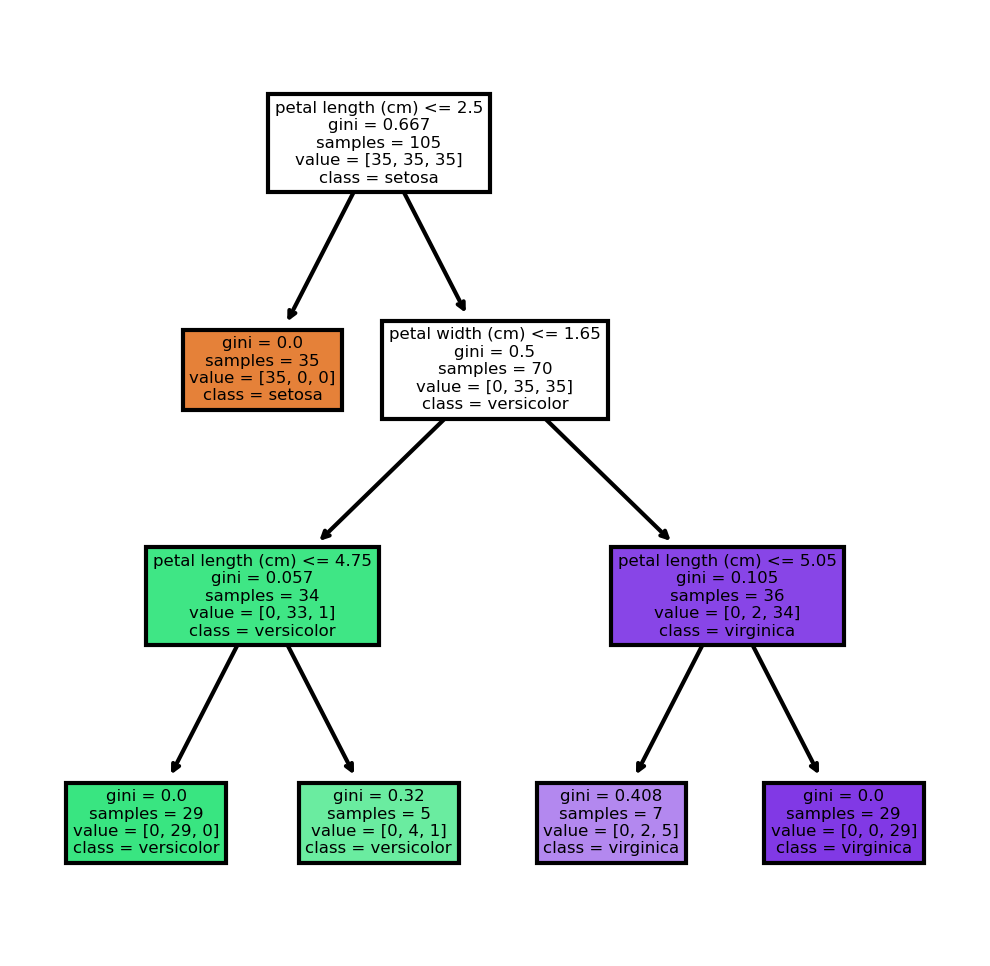

In [17]:
# plotting the decision tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(clf, feature_names = fn, 
               class_names=cn,
               filled = True);

In [8]:
# Making prediction
y_pred = clf.predict(X_test)
y_pred

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
# Confusion matrix

c = confusion_matrix(y_test, y_pred)
c

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 12]], dtype=int64)

In [22]:
# Considering setosa as positive and (virginica, versicolor) as negative

accuracy = (15+15+12)/len(y_pred)  # (TP+TN/(TP+TN+FP+FN))
accuracy

0.9333333333333333

In [31]:
precision = 15 / sum(c[:, 0])      # (TP/TP+FP)
precision

1.0

In [32]:
sensitivity = 15 / sum(c[0, :])    # (TP/TP+FN)
sensitivity

1.0

In [34]:
specificity =  (15 + 12)/(sum(c[1,:]) + sum(c[2,:]))                    # (TN/FP+TN)
specificity

0.9

In [42]:
def cross_validation(x_train, y_train, k):                           # function taking the argument x-train, y_train and k
    try:
        val_score_list=[]
        end = 0

        #---------------------------Shuffling the data------------------------------------------------

        x_sample = x_train.sample(len(x_train))            # shuffling the data randomly
        index_list = list(x_sample.index)                  # storing the index of shuffled data in a list
        y_sample = []

        for j in index_list:
            y_sample.append(y_train.iloc[j,])              # storing value of y corresponding to the index of x_sample

        df = pd.DataFrame(x_sample)                        # creating a dataframe having x_sample, shuffled value of x_train
        df.insert(0, 'species', y_sample)                      # inserting column of y_sample at 0th index

        x_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]   # x_train has shuffled rows of predictors
        y_train = df['species']                                      # y_train is shuffled target variable

        #------------------------train and validation set-----------------------------------------------------

        for i in range(k):                               # since data is divided in k parts, loop will run k times
            start = end                                  # starting index
            end = start + (len(x_train) // k)            # ending index

            if i != k-1:                                 # except for last value of k, validation set will have records from start to end index
                validation_x = x_train.iloc[start:end]
                validation_y = y_train.iloc[start:end]
            else:
                validation_x = x_train.iloc[start:]      # for last value of k, validation set will have all remaining values except training set
                validation_y = y_train.iloc[start:]

            train1_x = x_train.iloc[:start]              
            train2_x = x_train.iloc[end:]
            train_x = train1_x.append(train2_x)          # train_x has all values of predictors except those which are in validation set

            train1_y = y_train.iloc[:start]
            train2_y = y_train.iloc[end:]
            train_y = train1_y.append(train2_y)          # train_y has all values of predictors except those which are in validation set

        #----------------------------fitting the decision tree classifier model--------------------------------------

            clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 5)
            clf_gini.fit(train_x, train_y)
            
            y_pred = clf_gini.predict(validation_x)
            
            c = confusion_matrix(validation_y, y_pred)
            
            cv_score = (c[0,0] + c[1,1] + c[2,2])/len(y_pred)
            val_score_list.append(cv_score)

        # returning average of CV scores
        return np.mean(val_score_list)
    
    except:
        print("Some error occured")                # exception is thrown

In [43]:
cross_validation(X,y,10)

0.96

### Decision tree regression

In [44]:
cars = pd.read_csv("datasets/cars.csv")

In [45]:
cars

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US


In [46]:
X = cars[["Cylinders", "Weight", "Horsepower"]]
y = cars["MPG"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [48]:
# fitting a decision tree regressor
model = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [49]:
y_pred = model.predict(X_test)

In [50]:
y_pred

array([19.2483871 , 32.89833333, 25.4452381 , 25.4452381 , 25.74545455,
       25.4452381 , 19.2483871 , 25.4452381 , 19.2483871 , 25.4452381 ,
       32.89833333, 11.7       , 11.7       , 32.89833333, 25.4452381 ,
       25.4452381 , 28.51071429, 19.2483871 , 25.74545455, 25.4452381 ,
       25.4452381 , 25.4452381 , 25.4452381 , 28.51071429, 19.2483871 ,
       15.12564103, 19.2483871 , 19.2483871 , 25.4452381 , 32.89833333,
       19.2483871 , 19.2483871 , 25.74545455, 32.89833333, 15.12564103,
       32.89833333, 19.2483871 , 25.4452381 , 19.2483871 , 11.7       ,
       25.74545455, 32.89833333, 19.2483871 , 19.2483871 , 32.89833333,
       25.4452381 , 15.12564103, 32.89833333, 25.4452381 , 19.2483871 ,
       32.89833333, 28.91111111, 25.74545455, 11.7       , 11.7       ,
       19.2483871 , 11.7       , 32.89833333, 19.2483871 , 15.12564103,
       19.2483871 , 19.2483871 , 32.89833333, 19.2483871 , 19.2483871 ,
       25.4452381 , 32.89833333, 32.89833333, 32.89833333, 32.89

In [52]:
# RMSE
np.sqrt(np.mean((np.array(y_test) - y_pred)**2))

4.0609608091030545

In [53]:
# MAE
np.mean(np.abs((np.array(y_test) - y_pred)))

2.883790833410082